In [1]:
import numpy as np
import healpy as hp
import matplotlib
import matplotlib.pyplot as plt

In [21]:
# This cell can be re-run to reload any changes made to other classes without restarting the kernel
import importlib
import minkfncts2d
import ImageTools
import Create_Image_PSD
import Generate_Stats
import Generate_Plots
importlib.reload(minkfncts2d)
importlib.reload(ImageTools)
importlib.reload(Create_Image_PSD)
importlib.reload(Generate_Stats)
importlib.reload(Generate_Plots)
from Generate_Stats import StatMaker
from Generate_Plots import PlotMaker

In [ ]:
# Create a StatMaker instance from image set in Planck_dust_cuts_353GHz.h5
# Use smcache.h5 as a cache for the statistics. This file will be created if it doesn't exist.
# Set the name to be used when creating plots to 'Planck 353GHz'
# Images per batch is 16 - should be the same as the first time a StatMaker was created with given cache file
realsm = StatMaker('smcache.h5', 'Planck 353GHz', 'Planck_dust_cuts_353GHz.h5', 16)
realsm.calculateStatistics() # This will load all statistics either from cache or calculate and cache them for each image batch as necessary

In [ ]:
fake1v3 = StatMaker('fakes/1.3/1000images.smcache.h5', 'v1.3', 'fakes/1.3/1000images.h5', 16)
fake1v3.calculateStatistics()

In [6]:
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'viridis',
    'axes.grid': False,
    'savefig.dpi': 100,  # to adjust notebook inline plot size
    'axes.labelsize': 15, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    'font.size': 12, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
#    'figure.figsize': [3.39, 2.10],
    'figure.figsize': [6.78, 4.20],
    'font.family': 'serif',
}
matplotlib.rcParams.update(params)

/nfs/home/mhaq/myVE3/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


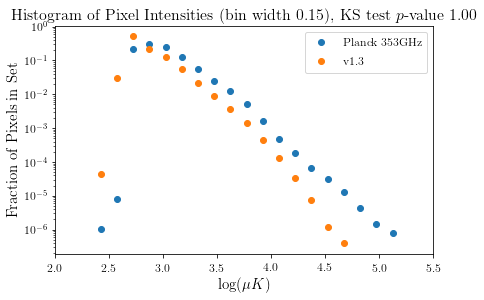

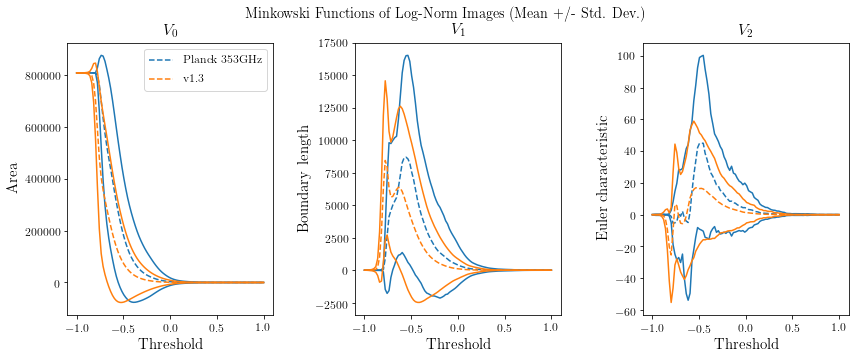

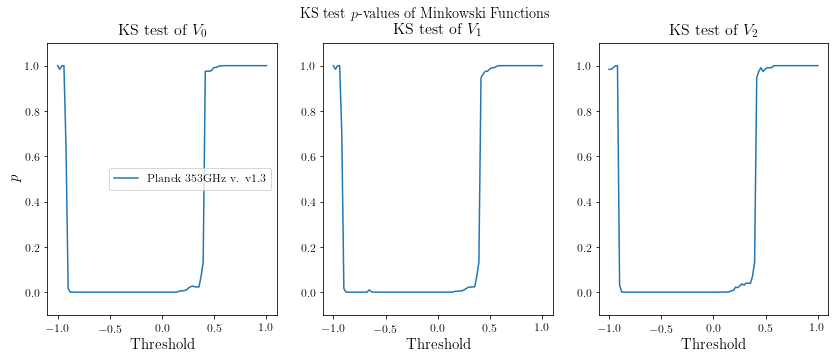

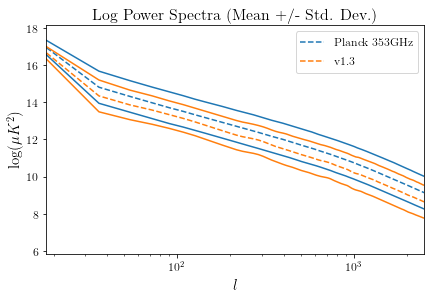

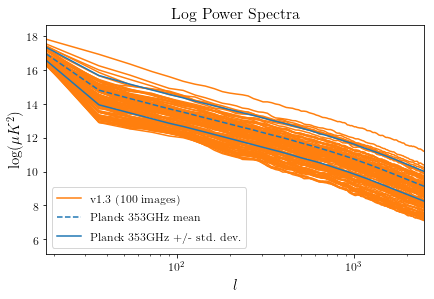

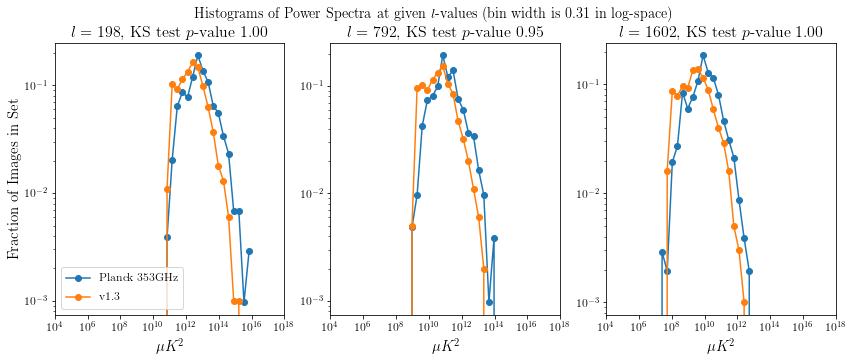

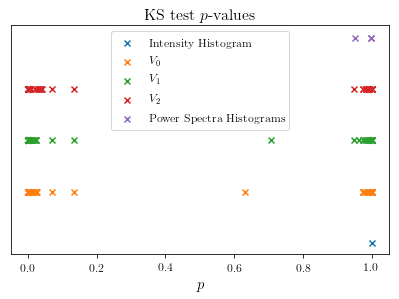

In [19]:
# This cell will make the following plots:
# - Pixel intensity histogram
# - Minkowski functionals
# - KS-test of the Minkowski functionals
# - Log power spectra mean +/- std dev
# - Log power spectra mean +/- std dev of first StatMaker and Power spectra of individual images from second StatMaker
# - Slices of power spectra histogram at specified ell-values
# - Scatter plot of KS-test p-values for the above plots

pm = PlotMaker()

# Set to True to save figures as PDFs
save_figures = False
save_figures_filename_prefix = "plots/real_1.3/"

# Specify the stat makers to plot here - can be more than 2!
statmakers = [realsm, fake1v3]

# This is used to convert from ell to k in the power spectra
# 360 degrees around the sky divided by 20 degrees wide image at the equator
k2ell = 360.0/20.0

# These specify the range, bin count, and ell-values to use for the slices of power spectra histograms
slice_ps_hist_range = [6.0, 16.0]
slice_ps_hist_bin_count = 32
slice_ps_hist_ell_values = [200, 800, 1600]
slice_ps_hist_k_values = [int(round(float(ell_value) / k2ell)) for ell_value in slice_ps_hist_ell_values]

# These are the image indexes to use when plotting power spectra of individual images from the second StatMaker
individual_ps_image_idxs = np.arange(100)*10

fig = 0

fig += 1
plt.figure(fig)
plt.clf()
kstest_intensity_histogram = pm.plotIntensityHistograms(statmakers, True, True)
kstest_intensity_histogram_p = kstest_intensity_histogram[0][1]
plt.xlim(2, 5.5)
if save_figures:
    plt.savefig(save_figures_filename_prefix+'HistPixIntensity.pdf')

fig += 1
plt.figure(fig, figsize=(14, 5))
plt.clf()
pm.plotMinkowskiFunctionals(statmakers)
plt.subplots_adjust(wspace=0.4)
if save_figures:
    plt.savefig(save_figures_filename_prefix+'MinkowskiFunctionals.pdf')
(kstest_mf_t, kstest_mf_V0, kstest_mf_V1, kstest_mf_V2) = pm.kstestMinkowskiFunctionals(statmakers)
kstest_mf_V0_ps = [Dp[1] for Dp in kstest_mf_V0[0]]
kstest_mf_V1_ps = [Dp[1] for Dp in kstest_mf_V1[0]]
kstest_mf_V2_ps = [Dp[1] for Dp in kstest_mf_V2[0]]

fig += 1
plt.figure(fig, figsize=(14, 5))
plt.clf()
pm.plotKSTestpMinkowskiFunctionals(statmakers, kstest_mf_t, kstest_mf_V0, kstest_mf_V1, kstest_mf_V2)
if save_figures:
    plt.savefig(save_figures_filename_prefix+'KSTestMinkowskiFunctionals.pdf')

fig += 1
plt.figure(fig)
plt.clf()
pm.plotLogPowerSpectra(statmakers, k2ell)
plt.xlim(18, 2500)
if save_figures:
    plt.savefig(save_figures_filename_prefix+'LogPowerSpectra.pdf')

fig += 1
plt.figure(fig)
plt.clf()
pm.plotIndividualLogPowerSpectra(statmakers[0], statmakers[1], individual_ps_image_idxs, k2ell)
plt.xlim(18, 2500)
if save_figures:
    plt.savefig(save_figures_filename_prefix+'IndividualLogPowerSpectra.pdf')

fig += 1
plt.figure(fig, figsize=(14, 5))
plt.clf()
kstest_powerspectra_histograms = pm.plotLogPowerSpectraHistogramsAtKValues(statmakers, k_values, k2ell, k_hist_range, k_hist_bin_count, True, True)
kstest_powerspectra_histograms_p = [Dp[1] for Dp in kstest_powerspectra_histograms[0]]
if save_figures:
    plt.savefig(save_figures_filename_prefix+'HistPowerSpectraSlices.pdf')

fig += 1
plt.figure(fig)
plt.clf()
ax = plt.subplot(111)
plt.scatter(kstest_intensity_histogram_p, 1, cmap='C1', marker='x', label='Intensity Histogram')
plt.scatter(kstest_mf_V0_ps, [2 for n in range(len(kstest_mf_V0_ps))], cmap='C2', marker='x', label='$V_0$')
plt.scatter(kstest_mf_V1_ps, [3 for n in range(len(kstest_mf_V1_ps))], cmap='C3', marker='x', label='$V_1$')
plt.scatter(kstest_mf_V2_ps, [4 for n in range(len(kstest_mf_V2_ps))], cmap='C4', marker='x', label='$V_2$')
plt.scatter(kstest_powerspectra_histograms_p, [5 for n in range(len(kstest_powerspectra_histograms_p))], cmap='C5', marker='x', label='Power Spectra Histograms')
plt.title('KS test $p$-values')
plt.xlabel('$p$')
ax.set_xlim(0.0, 1.0)
ax.set_xbound(-0.05, 1.05)
plt.yticks([])
plt.legend()
if save_figures:
    plt.savefig(save_figures_filename_prefix+'KSTestsScatter.pdf')

plt.show()

/nfs/home/mhaq/353cuts/Generate_Plots.py:286: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(smhist / float(sm_num_images*sm_shape[0]*sm_shape[1])), self.colors[0]+'o')
/nfs/home/mhaq/353cuts/Generate_Plots.py:295: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(hist_avg / float(num_pixels))
/nfs/home/mhaq/353cuts/Generate_Plots.py:307: RuntimeWarning: divide by zero encountered in true_divide
  yerr = 1.0 / (np.sqrt(hist_avg) * np.log(10.0))
/nfs/home/mhaq/myVE3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:3251: RuntimeWarning: invalid value encountered in double_scalars
  high = [thisx + thiserr for (thisx, thiserr)


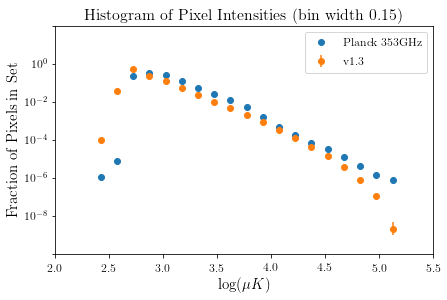

In [20]:
# This cell plots the intensity histogram of a StatMaker along with an intensity histogram distribution with error bars stored in a generated file
# The file is generated by scripts/gen_GAN_intensity_histograms.py

# Set to True to save the figure to the specified file
save_figure = False
save_figure_filename = 'HistPixIntensityWithErrorBars.pdf'

pm = PlotMaker()

plt.figure(1)
plt.clf()
# Specify the StatMaker, histograms file, and name for the plot of the histograms file
pm.plotIntensityHistogramsWithErrorBars(realsm, 'GAN_1v3_100by1000_histograms.h5', 'v1.3')
plt.xlim(2.0, 5.5)
if save_figure:
    plt.savefig(save_figure_filename)

plt.show()

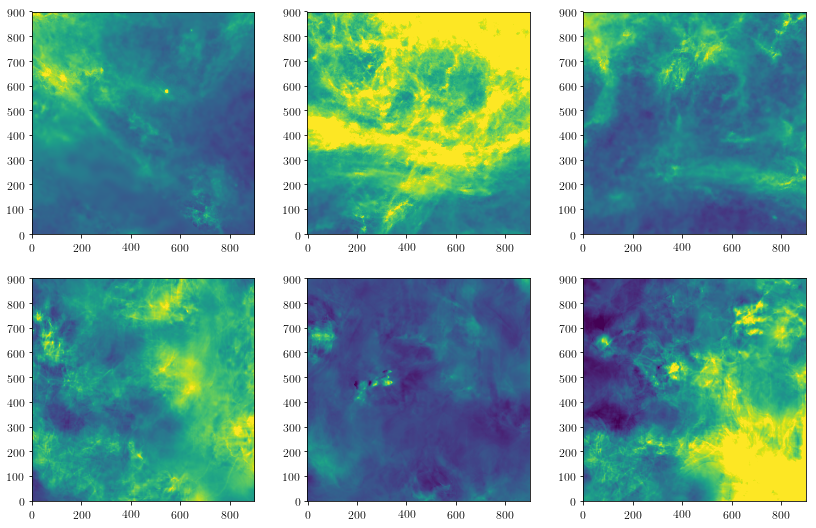

In [11]:
subplot_cols = 3
real_image_idx = [ 100, 200, 310 ]
fake_image_idx = [ 100, 200, 302 ]
real_images = [np.log10(realsm.getImage(i)) for i in real_image_idx]
fake_images = [np.log10(fake1v3.getImage(i)) for i in fake_image_idx]
images_mean = np.mean(real_images+fake_images)
images_sigma = np.std(real_images+fake_images)
images_vmin = images_mean-2*images_sigma
images_vmax = images_mean+2*images_sigma
plt.figure(1, figsize=(14, 9))
plt.clf()
subplot_num = 200 + 10*subplot_cols + 1
for image in real_images:
    plt.subplot(subplot_num)
    plt.imshow(image, cmap="viridis", vmin=images_vmin, vmax=images_vmax)
    subplot_num += 1
for image in fake_images:
    plt.subplot(subplot_num)
    plt.imshow(image, cmap="viridis", vmin=images_vmin, vmax=images_vmax)
    subplot_num += 1
plt.show()

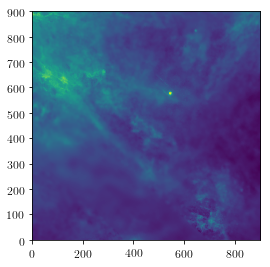

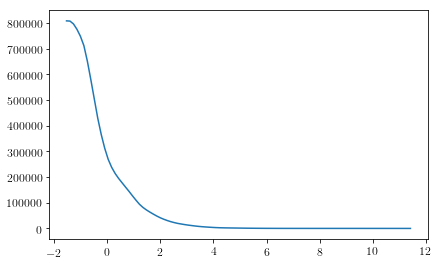

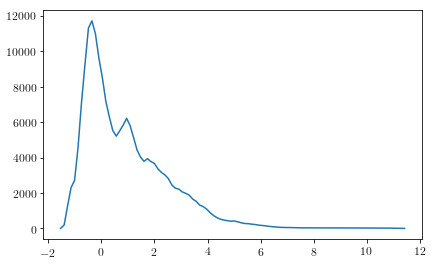

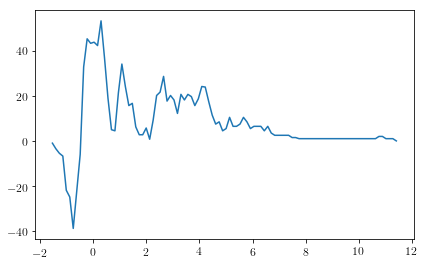

In [13]:
image = realsm.getImage(100)
min_image = np.min(image)
max_image = np.max(image)
nimage = (image - np.mean(image))/np.std(image)

mf_thresholds = np.linspace(np.min(nimage), np.max(nimage), 100)

F = []
U = []
Chi = []
    
for threshold in mf_thresholds:
    (f, u, chi) = minkfncts2d.MF2D(nimage, threshold)
    F.append(f)
    U.append(u)
    Chi.append(chi)

plt.figure(1)
plt.imshow(np.log10(image), cmap="viridis")

x = mf_thresholds
plt.figure(2)
plt.clf()
plt.plot(x, F)

plt.figure(3)
plt.clf()
plt.plot(x, U)

plt.figure(4)
plt.clf()
plt.plot(x, Chi)

plt.show()